Hello there, everyone.  I did a brief analysis on the "managers" since at first glance the average "interest level" seemed to differ substantially from one to another . 

Anyway, let me know what you think about it and like this notebook if you enjoyed reading it (it's my 1st one, be nice :D)

In [1]:
# let's load the usual packages first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

... and get the data...

In [2]:
train_df = pd.read_json('../input/train.json')
test_df = pd.read_json('../input/test.json')

First of all, let's see how many different managers we have on both datasets.

In [3]:
man_train_list = train_df.manager_id.unique()
man_test_list = test_df.manager_id.unique()
print("Train: {0}".format(len(man_train_list)))
print("Test: {0}".format(len(man_test_list)))

Train: 3481
Test: 3851


There are more managers in the test dataset, which also features more records.

Let's create a dataframe with all the train and test managers, including the number of entries they are responsible for.

In [4]:
temp1 = train_df.groupby('manager_id').count().iloc[:,-1]
temp2 = test_df.groupby('manager_id').count().iloc[:,-1]
df_managers = pd.concat([temp1,temp2], axis = 1, join = 'outer')
df_managers.columns = ['train_count','test_count']
print(df_managers.head(20))

                                  train_count  test_count
0000abd7518b94c35a90d64b56fbf3e6         12.0        23.0
001ce808ce1720e24a9510e014c69707         10.0        18.0
003fc4e9a70053082f131b1054966aaf          1.0         3.0
00607a02f6efd9c6c7c588826e471ee9          2.0         9.0
00995ff28d79127ed2dca8320e9e7d09          3.0         6.0
00a8d77892cab18fffaa22a751f1f8eb          3.0         9.0
00f0b3346ba8379b26b95be8a19d46b1          1.0         NaN
00f526d80353a50a52bbc26919e7ed5a          1.0         1.0
01074bb974b125b65fa1b11a64c65135          3.0         1.0
01157144534c928d731696e57ae4cd09         13.0        29.0
0115c7abb8f1d3b50673f3af09fffd0e          NaN         1.0
011f9959a21777007f3cfed4d9138d15          NaN         1.0
01287194f20de51872e81f660def4784          9.0        11.0
014520259b01b5c8523599de9d021285          4.0         2.0
015ec75d52e204706be746706530371f          3.0         3.0
016ae4f8903a08719d9d9f232d61d3ba          6.0         5.0
0176ff9c2592a7

Some managers have entries only in one of the two datasets. But as we will see later, these managers have only very few entries.

Indeed, a minority of managers are responsible for most of the entries of both dataset

In [5]:
print(df_managers.sort_values(by = 'train_count', ascending = False).head(10))

                                  train_count  test_count
e6472c7237327dd3903b3d6f6a94515a       2533.0      3854.0
6e5c10246156ae5bdcd9b487ca99d96a        711.0       972.0
8f5a9c893f6d602f4953fcc0b8e6e9b4        410.0       601.0
62b685cc0d876c3a1a51d63a0d6a8082        402.0       554.0
cb87dadbca78fad02b388dc9e8f25a5b        373.0       598.0
9df32cb8dda19d3222d66e69e258616b        330.0       532.0
b7de4cb395920136663132057fa89d84        320.0       529.0
2aa9bfa5f67ed9997ea341dee8a3a271        316.0       537.0
ad3d8ddc52c7e0859b5c6c7f7949c3bd        305.0       427.0
c9c33695ee2a2f818e9f1d8f7d1c4b39        299.0       432.0


This is more clear if one looks at the plots for the cumulative distributions.

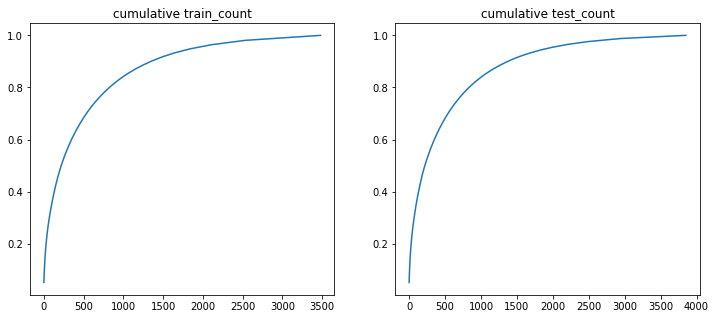

In [6]:
fig, axes = plt.subplots(1,2, figsize = (12,5))
temp = df_managers['train_count'].dropna().sort_values(ascending = False).reset_index(drop = True)
axes[0].plot(temp.index+1, temp.cumsum()/temp.sum())
axes[0].set_title('cumulative train_count')

temp = df_managers['test_count'].dropna().sort_values(ascending = False).reset_index(drop = True)
axes[1].plot(temp.index+1, temp.cumsum()/temp.sum())
axes[1].set_title('cumulative test_count')

The Pareto principle, i.e. the 80/20 rule, seems to apply here. As 20% of the managers are roughly responsible for roughly 80% of the entries.

In [7]:
ix20 = int(len(df_managers['train_count'].dropna())*0.2)
print("TRAIN: 20% of managers ({0}) responsible for {1:2.2f}% of entries".format(ix20,df_managers['train_count'].sort_values(ascending = False).cumsum().iloc[ix20]/df_managers['train_count'].sum()*100))

ix20 = int(len(df_managers['test_count'].dropna())*0.2)
print("TEST: 20% of managers ({0}) responsible for {1:2.2f}% of entries".format(ix20, df_managers['test_count'].sort_values(ascending = False).cumsum().iloc[ix20]/df_managers['test_count'].sum()*100))

TRAIN: 20% of managers (696) responsible for 76.16% of entries
TEST: 20% of managers (770) responsible for 78.24% of entries


As mentioned before, fortunately, these top contributors are the same for both datasets. The managers featuring in only one of the two datasets usually have very few entries.

In [8]:
man_not_in_test = set(man_train_list) - set(man_test_list)
man_not_in_train = set(man_test_list) - set(man_train_list)

print("{} managers are featured in train.json but not in test.json".format(len(man_not_in_test)))
print("{} managers are featured in test.json but not in train.json".format(len(man_not_in_train)))

548 managers are featured in train.json but not in test.json
918 managers are featured in test.json but not in train.json


In [9]:
print(df_managers.loc[list(man_not_in_test)]['train_count'].describe())
print(df_managers.loc[list(man_not_in_train)]['test_count'].describe())

count    548.000000
mean       1.229927
std        0.590957
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: train_count, dtype: float64
count    918.000000
mean       1.605664
std        1.101823
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: test_count, dtype: float64


Besides, it looks like there is a strong correlation between the number of entries of the contributors in both datasets.

In [10]:
df_managers.sort_values(by = 'train_count', ascending = False).head(1000).corr()

,train_count,test_count
train_count,1.000000,0.995831
test_count,0.995831,1.000000


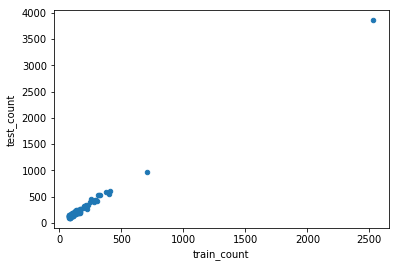

In [11]:
df_managers.sort_values(by = 'train_count', ascending = False).head(100).plot.scatter(x = 'train_count', y = 'test_count')

Now let's focus on the training dataset and on the "interest_level" of its top 100 contributors.
These folks account for a whopping 35% of the entries. The 1st alone for over 5% of them! That's quite a lot. 

According to the discussion above, similar figures are expected for the test dataset.

In [12]:
temp = df_managers['train_count'].sort_values(ascending = False).head(100)
temp = pd.concat([temp,temp.cumsum()/df_managers['train_count'].sum()*100], axis = 1).reset_index()
temp.columns = ['manager_id','count','percentage']
print(temp)

                          manager_id   count  percentage
0   e6472c7237327dd3903b3d6f6a94515a  2533.0    5.132517
1   6e5c10246156ae5bdcd9b487ca99d96a   711.0    6.573189
2   8f5a9c893f6d602f4953fcc0b8e6e9b4   410.0    7.403955
3   62b685cc0d876c3a1a51d63a0d6a8082   402.0    8.218512
4   cb87dadbca78fad02b388dc9e8f25a5b   373.0    8.974307
5   9df32cb8dda19d3222d66e69e258616b   330.0    9.642973
6   b7de4cb395920136663132057fa89d84   320.0   10.291376
7   2aa9bfa5f67ed9997ea341dee8a3a271   316.0   10.931675
8   ad3d8ddc52c7e0859b5c6c7f7949c3bd   305.0   11.549684
9   c9c33695ee2a2f818e9f1d8f7d1c4b39   299.0   12.155536
10  1fb46c4a72bcf764ac35fc23f394760d   289.0   12.741125
11  d2bce61e0e0079ebdc8c281e415e045b   276.0   13.300373
12  5599e962719af3ccc2976855c2d5893c   256.0   13.819095
13  aa9e353a6b43b125cbc89cb751090a9e   246.0   14.317556
14  62826f3ae01f2ddc93b9cd28c659ab2b   233.0   14.789674
15  8b53ccf4338806ab1be3dd0267711649   222.0   15.239504
16  612a00076aefe8c98d1df483564

Let's isolate the entries relative to these 100 managers with the "interest_level" column as well. We create dummies from this latter column as they are easier to work with.

In [13]:
man_list = df_managers['train_count'].sort_values(ascending = False).head(100).index
ixes = train_df.manager_id.isin(man_list)
df100 = train_df[ixes][['manager_id','interest_level']]
interest_dummies = pd.get_dummies(df100.interest_level)
df100 = pd.concat([df100,interest_dummies[['low','medium','high']]], axis = 1).drop('interest_level', axis = 1)

print("The top100 contributors account for {} entries\n".format(len(df100)))

print(df100.head(10))

The top100 contributors account for 17472 entries

                              manager_id  low  medium  high
10      5ba989232d0489da1b5f2c45f6688adc    0       1     0
10000   7533621a882f71e25173b27e3139d83d    1       0     0
100004  d9039c43983f6e564b1482b273bd7b01    0       0     1
100007  1067e078446a7897d2da493d2f741316    1       0     0
100014  b209e2c4384a64cc307c26759ee0c651    0       1     0
100020  e6472c7237327dd3903b3d6f6a94515a    1       0     0
100026  c1a6598437b7db560cde66e5a297a53f    0       1     0
100044  537e06890f6a86dbb70c187db5be4d55    0       0     1
100051  dbbb6b990661b1e507a387f019bcb1a0    0       1     0
100055  8f5a9c893f6d602f4953fcc0b8e6e9b4    1       0     0


Before continuing, let's give them some fake identities based on the most common first and last names in the US.

In [14]:
import itertools

# 50 most common surnames in the 90s (http://surnames.behindthename.com/top/lists/united-states/1990)
last_names = ['Smith', 'Johnson', 'Williams', 'Jones', 'Brown', 'Davis', 'Miller', 'Wilson', 'Moore', 
 'Taylor', 'Anderson', 'Thomas', 'Jackson', 'White', 'Harris', 'Martin', 'Thompson', 'Garcia', 
 'Martinez', 'Robinson', 'Clark', 'Rodriguez', 'Lewis', 'Lee', 'Walker', 'Hall', 'Allen', 'Young',
 'Hernandez', 'King', 'Wright', 'Lopez', 'Hill', 'Scott', 'Green', 'Adams', 'Baker', 'Gonzalez', 'Nelson', 
 'Carter', 'Mitchell', 'Perez', 'Roberts', 'Turner', 'Phillips', 'Campbell', 'Parker', 'Evans', 'Edwards', 'Collins']

# 10 most common first names for females and males (names.mongabay.com) 
first_names = ['Mary',  'Patricia',  'Linda',  'Barbara',  'Elizabeth',  
               'Jennifer',  'Maria',  'Susan',  'Margaret',  'Dorothy',
               'James', 'John', 'Robert', 'Michael', 'William', 'David',
               'Richard', 'Charles', 'Joseph', 'Thomas']

names = [first + ' ' + last for first,last in (itertools.product(first_names, last_names))]

# shuffle them
np.random.seed(12345)
np.random.shuffle(names)

dictionary = dict(zip(man_list, names))
df100.loc[df100.manager_id.isin(dictionary), 'manager_id' ] = df100['manager_id'].map(dictionary)
print(df100.head())

              manager_id  low  medium  high
10       Elizabeth Jones    0       1     0
10000        Maria Clark    1       0     0
100004     William Smith    0       0     1
100007  William Robinson    1       0     0
100014     Thomas Garcia    0       1     0


In [15]:
# see if the name coincides
print(names[:10])
print(df100.groupby('manager_id').count().sort_values(by = 'low', ascending = False).head(10))

['Linda Phillips', 'Richard Scott', 'Jennifer Clark', 'Dorothy Martinez', 'Thomas Jackson', 'Barbara Baker', 'Joseph Roberts', 'James Thompson', 'Jennifer Baker', 'Dorothy Moore']
                   low  medium  high
manager_id                          
Linda Phillips    2533    2533  2533
Richard Scott      711     711   711
Jennifer Clark     410     410   410
Dorothy Martinez   402     402   402
Thomas Jackson     373     373   373
Barbara Baker      330     330   330
Joseph Roberts     320     320   320
James Thompson     316     316   316
Jennifer Baker     305     305   305
Dorothy Moore      299     299   299


Splendid... we have their names now, so let's proceed and compute their average performances in terms of "interest level" so we can spot who's a pro and who's not. 

In [16]:
gby = pd.concat([df100.groupby('manager_id').mean(),df100.groupby('manager_id').count()], axis = 1).iloc[:,:-2]
gby.columns = ['low','medium','high','count']
gby.sort_values(by = 'count', ascending = False).head(10)

,low,medium,high,count
manager_id,,,,
Linda Phillips,0.686538,0.245559,0.067904,2533
Richard Scott,0.905767,0.088608,0.005626,711
Jennifer Clark,0.987805,0.009756,0.002439,410
Dorothy Martinez,1.000000,0.000000,0.000000,402
Thomas Jackson,0.361930,0.490617,0.147453,373
Barbara Baker,0.827273,0.130303,0.042424,330
Joseph Roberts,0.987500,0.012500,0.000000,320
James Thompson,0.515823,0.363924,0.120253,316
Jennifer Baker,0.918033,0.078689,0.003279,305


Their performances seem very different, even for people with similar number of entries.

Indeed they are..

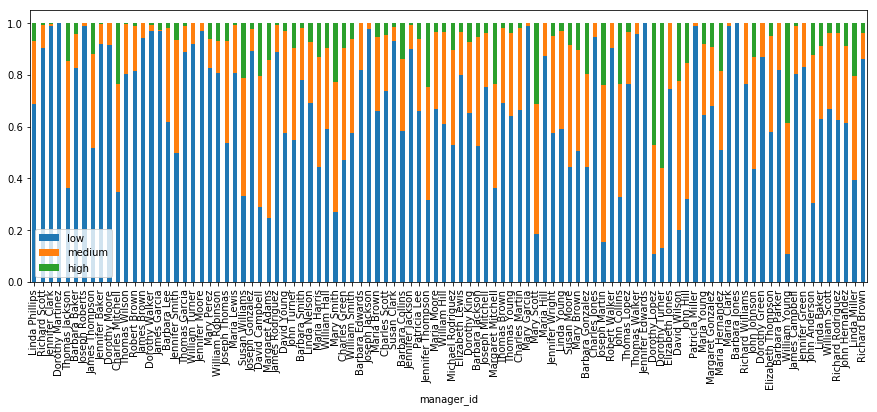

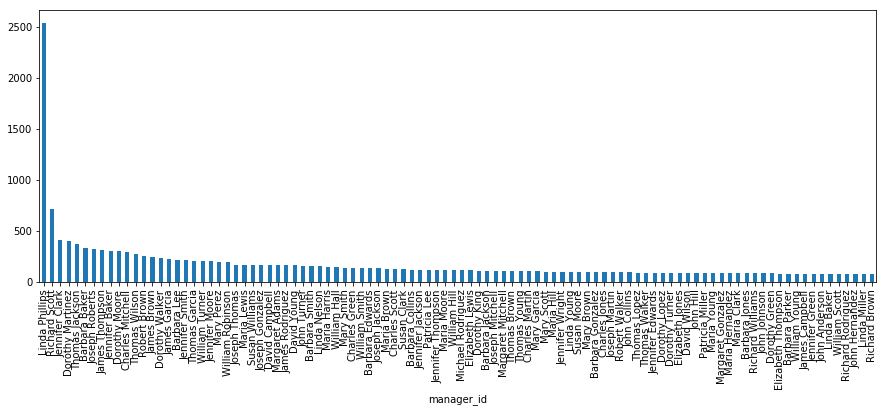

In [17]:
gby.sort_values(by = 'count', ascending = False).drop('count', axis = 1).plot(kind = 'bar', stacked = True, figsize = (15,5))
plt.figure()
gby.sort_values(by = 'count', ascending = False)['count'].plot(kind = 'bar', figsize = (15,5))

I think this high diversity should be accounted for when building our predictive model! 

It would be interesting to rank the managers based on their intereset levels. For instance, we could compute their "skill" by assigning 0 points for "lows", 1 for "mediums" and 2 for "highs". Since they have different number of entries, let's quickly do so by multiplying the average results.

In [18]:
gby['skill'] = gby['medium']*1 + gby['high']*2 

print("Top performers")
print(gby.sort_values(by = 'skill', ascending = False).reset_index().head())
print("\nWorst performers")
print(gby.sort_values(by = 'skill', ascending = False).reset_index().tail())

Top performers
       manager_id       low    medium      high  count     skill
0  Dorothy Turner  0.131868  0.307692  0.560440     91  1.428571
1   Dorothy Lopez  0.109890  0.417582  0.472527     91  1.362637
2   William Young  0.108434  0.506024  0.385542     83  1.277108
3      Mary Scott  0.186275  0.500000  0.313725    102  1.127451
4   Joseph Martin  0.156250  0.604167  0.239583     96  1.083333

Worst performers
          manager_id       low    medium  high  count     skill
95   Patricia Miller  0.988764  0.011236   0.0     89  0.011236
96       Mary Garcia  0.990291  0.009709   0.0    103  0.009709
97  Jennifer Edwards  1.000000  0.000000   0.0     93  0.000000
98     Barbara Jones  1.000000  0.000000   0.0     85  0.000000
99  Dorothy Martinez  1.000000  0.000000   0.0    402  0.000000


Dorothy Turner and Dorothy Lopez are rocking it! Poor Dorothy Martinez instead should consider moving to another industry... 402 entries, all of them uninspiring (btw I did not pick the random seed to have all the Dorothies here...).

I won't go deeper to try to explain why these performances are so different. It seems though like most of the managers do a poor job (I am sure it ain't their fault, is just that the properties they handle are not that cool after all...).

Cheers!

p.s.: I did a similar analysis on "building_id" here --> https://www.kaggle.com/den3b81/two-sigma-connect-rental-listing-inquiries/some-insights-on-building-id

low         0.661989
medium      0.259239
high        0.078772
count     174.720000
skill       0.416782
dtype: float64


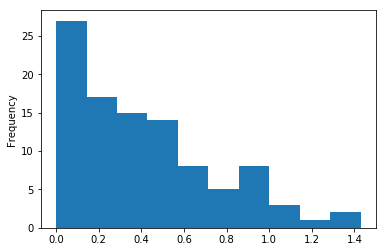

In [19]:
gby.skill.plot(kind = 'hist')
print(gby.mean())